![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    BinFitterCP
</b>
</span>

---
**Notebook version**: `1` (7 Nov 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Fit function to *binned* data and give confidence interval and prediction interval

</br>

# **Imports**

In [1]:
import importlib.metadata
from datetime import datetime
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet
from diive.pkgs.fits.fitter import BinFitterCP
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.84.0


</br>

# **Load example data**

In [2]:
df = load_exampledata_parquet()
df = df.loc[(df.index.month >= 6) & (df.index.month <= 9)].copy()  # Keep data between June and September across all years
df = df.loc[df['Rg_f'] > 20]  # Keep daytime data
df

Loaded .parquet file F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.072 seconds). Detected time resolution of <30 * Minutes> / 30min 


,ET_f,GPP_CUT_16_f,GPP_CUT_84_f,GPP_CUT_REF_f,GPP_DT_CUT_16,GPP_DT_CUT_84,GPP_DT_CUT_REF,LE_f,LE_orig,LW_IN,NEE_CUT_16_f,NEE_CUT_16_orig,NEE_CUT_84_f,NEE_CUT_84_orig,NEE_CUT_REF_f,NEE_CUT_REF_orig,PA,PPFD,PREC_TOT_T1_25+20_1,QCF_LE,QCF_NEE,Reco_CUT_16,Reco_CUT_84,Reco_CUT_REF,Reco_DT_CUT_16,Reco_DT_CUT_84,Reco_DT_CUT_REF,Reco_DT_CUT_REF_SD,Rg_f,Rg_orig,RH,SWC_FF0_0.15_1,Tair_f,Tair_orig,Ustar_CUT_REF_Thres,VPD_f,VPD_orig
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-01 05:15:00,0.979,5.292,10.025,4.431,4.237,1.300,1.201,44.086,NaN,318.254,-2.125,NaN,-7.372,NaN,-2.385,NaN,828.610,14.031,0.2,NaN,NaN,3.167,2.653,2.047,2.076,0.668,0.681,1.540,37.857,37.857,98.673,34.812,0.100,0.100,0.288,0.082,0.082
2013-06-01 05:45:00,0.978,5.601,10.048,4.837,4.783,1.530,1.413,44.086,NaN,320.182,-2.509,NaN,-7.475,NaN,-2.843,NaN,828.823,18.236,0.1,NaN,NaN,3.092,2.574,1.994,2.023,0.635,0.650,1.478,44.997,44.997,99.813,34.775,-0.200,-0.200,0.288,0.011,0.011
2013-06-01 06:15:00,1.578,7.748,9.454,6.408,6.842,2.604,2.407,71.109,NaN,323.302,-4.597,NaN,-6.826,NaN,-4.375,NaN,829.143,33.108,0.1,NaN,1.0,3.151,2.628,2.032,2.056,0.656,0.661,1.524,80.490,80.490,99.673,34.757,0.000,0.000,0.288,0.020,0.020
2013-06-01 06:45:00,0.630,8.097,11.690,6.168,7.976,3.389,3.134,28.376,NaN,323.681,-4.878,NaN,-8.998,NaN,-4.092,NaN,829.607,62.008,0.0,NaN,1.0,3.219,2.692,2.076,2.095,0.681,0.675,1.578,108.790,108.790,99.000,34.716,0.233,0.233,0.288,0.062,0.062
2013-06-01 07:15:00,0.787,13.245,4.894,4.865,8.836,4.118,3.810,35.461,NaN,327.145,-9.993,-9.993,-2.173,NaN,-2.769,NaN,829.860,76.296,0.0,NaN,1.0,3.251,2.720,2.097,2.111,0.692,0.677,1.604,137.107,137.107,98.967,34.683,0.333,0.333,0.288,0.065,0.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30 15:45:00,1.033,2.756,5.046,2.977,4.398,3.869,4.628,46.411,NaN,321.785,-0.903,-0.903,-3.207,NaN,-0.903,-0.903,830.504,248.548,0.0,2.0,0.0,1.854,1.839,2.074,1.861,1.566,1.894,0.965,117.456,117.456,99.923,15.942,3.033,3.033,0.288,0.006,0.006
2022-09-30 16:15:00,0.472,5.035,4.882,5.256,4.217,3.689,4.442,21.205,21.205,313.387,-3.156,-3.156,-3.029,NaN,-3.156,-3.156,830.572,230.180,0.0,1.0,0.0,1.878,1.853,2.099,1.881,1.567,1.907,0.985,111.235,111.235,97.980,15.945,3.217,3.217,0.288,0.156,0.156
2022-09-30 16:45:00,0.436,0.237,3.733,0.454,3.150,2.705,3.344,19.607,19.607,313.184,1.633,1.633,-1.903,NaN,1.633,1.633,830.699,155.492,0.0,1.0,1.0,1.871,1.830,2.087,1.875,1.552,1.899,0.991,77.094,77.094,98.103,15.952,3.170,3.170,0.288,0.146,0.146


In [3]:
xcol = 'Tair_f'
ycol = 'VPD_f'

</br>

# **Fit to bins**

## Calculate fit

In [4]:
bf = BinFitterCP(
    df=df,
    xcol=xcol,
    ycol=ycol,
    predict_max_x=None,
    predict_min_x=None,
    n_predictions=1000,
    n_bins_x=10,
    bins_y_agg='mean',  # 'mean', 'median'
    fit_type='quadratic_offset'  # 'linear', 'quadratic_offset', 'quadratic', 'cubic'
)
bf.run()

</br>

## Results
- Results are stored in a dictionary

In [5]:
results = bf.get_results()
results.keys()

dict_keys(['input_df', 'xvar', 'yvar', 'fit_df', 'fit_equation', 'fit_equation_str', 'fit_type', 'fit_params_opt', 'fit_params_cov', 'fit_r2', 'bin_df', 'bins_x', 'bins_y', 'n_vals_per_bin'])

</br>

### Results: input dataframe

In [6]:
print("Input dataframe:")
display(results['input_df'].head(5))
print(f"Name of x variable: {results['xvar']}")
print(f"Name of y variable: {results['yvar']}")

Input dataframe:


,Tair_f,VPD_f,group
TIMESTAMP_MIDDLE,,,
2013-06-01 05:15:00,0.100,0.082,"(-3.0909999999999997, 6.858]"
2013-06-01 05:45:00,-0.200,0.011,"(-3.0909999999999997, 6.858]"
2013-06-01 06:15:00,0.000,0.020,"(-3.0909999999999997, 6.858]"
2013-06-01 06:45:00,0.233,0.062,"(-3.0909999999999997, 6.858]"
2013-06-01 07:15:00,0.333,0.065,"(-3.0909999999999997, 6.858]"


Name of x variable: Tair_f
Name of y variable: VPD_f


</br>

### Results: fit

In [7]:
print("Dataframe with fit data:")
display(results['fit_df'])
print(f"Fit equation: {results['fit_equation_str']}")
print(f"Fit equation type: {results['fit_type']}")
print(f"Fit optimal parameters: {results['fit_params_opt']}")
print(f"Fit estimated approximate covariance of optimal parameters: {results['fit_params_cov']}")
print(f"Fit r2: {results['fit_r2']}")

Dataframe with fit data:


,fit_x,fit_y,std,nom,lower_predband,upper_predband,nom_lower_ci95,nom_upper_ci95
0,4.749382,0.96+/-0.17,0.174410,0.963151,0.398039,1.528263,0.621306,1.304995
1,4.767261,0.96+/-0.17,0.173782,0.964125,0.399254,1.528997,0.623513,1.304738
2,4.785141,0.97+/-0.17,0.173155,0.965132,0.400501,1.529764,0.625749,1.304516
3,4.803021,0.97+/-0.17,0.172530,0.966171,0.401780,1.530563,0.628013,1.304330
4,4.820900,0.97+/-0.17,0.171907,0.967243,0.403090,1.531395,0.630305,1.304180
...,...,...,...,...,...,...,...,...
995,22.539635,17.82+/-0.17,0.172251,17.824730,17.257358,18.392102,17.487118,18.162341
996,22.557514,17.86+/-0.17,0.172864,17.857680,17.290063,18.425296,17.518867,18.196493
997,22.575394,17.89+/-0.17,0.173479,17.890662,17.322801,18.458523,17.550644,18.230680
998,22.593274,17.92+/-0.17,0.174096,17.923676,17.355570,18.491783,17.582449,18.264903


Fit equation: y = 0.0503x^2-0.4238x+1.8422
Fit equation type: quadratic_offset
Fit optimal parameters: [ 0.05026231 -0.42381024  1.8422392 ]
Fit estimated approximate covariance of optimal parameters: [[ 4.97036745e-06 -1.36281834e-04  8.02001927e-04]
 [-1.36281834e-04  3.89109086e-03 -2.40837991e-02]
 [ 8.02001927e-04 -2.40837991e-02  1.61905338e-01]]
Fit r2: 0.999999685472016


</br>

### Results: bins

In [8]:
print("Dataframe with binned data:")
display(results['bin_df'].head(5))
print(f"\nBins x-data:")
display(results['bins_x'])
print(f"\nBins y-data:")
display(results['bins_y'])
print(f"\nNumber of values per bin: {results['n_vals_per_bin']}")

Dataframe with binned data:


Tair_f                                                               VPD_f                                                         BIN_START
                                 q25       mean     max     min       std  median      q75 count     q25      mean     max  min       std  median      q75 count          
group                                                                                                                                                                     
(-3.0909999999999997, 6.858]   3.767   4.749382   6.857  -3.090  1.737940   5.200   6.1000  3123  0.3340  1.135270   6.350  0.0  1.050537  0.8370  1.67850  3123   -3.0900
(6.858, 8.933]                 7.474   7.977157   8.933   6.858  0.596097   8.000   8.5000  3150  0.4970  1.632170   7.813  0.0  1.415912  1.2735  2.39525  3150    6.8579
(8.933, 10.5]                  9.394   9.762413  10.500   8.934  0.446472   9.770  10.1525  3131  0.8385  2.332870   9.637  0.0  1.809198  2.0070  3.43650  3131    8.9330
(10.5, 11.865]                10.860  11.190064  11.863  10.503  0.385815  11.200  11.5330  3088  1.4395  3.155438  10.996  0.0  2.106894  2.8910  4.61425  3088   10.5000
(11.865, 13.363]              12.217  12.587682  13.363  11.866  0.429423  12.582  12.9370  3127  2.6345  4.344406  12.428  0.0  2.333633  4.1500  5.93700  3127   11.8648


Bins x-data:


group
(-3.0909999999999997, 6.858]     4.749382
(6.858, 8.933]                   7.977157
(8.933, 10.5]                    9.762413
(10.5, 11.865]                  11.190064
(11.865, 13.363]                12.587682
(13.363, 14.948]                14.163956
(14.948, 16.6]                  15.762458
(16.6, 18.333]                  17.440554
(18.333, 20.543]                19.367110
(20.543, 28.713]                22.611153
Name: mean, dtype: float64


Bins y-data:


group
(-3.0909999999999997, 6.858]     1.135270
(6.858, 8.933]                   1.632170
(8.933, 10.5]                    2.332870
(10.5, 11.865]                   3.155438
(11.865, 13.363]                 4.344406
(13.363, 14.948]                 5.999335
(14.948, 16.6]                   7.819566
(16.6, 18.333]                  10.041974
(18.333, 20.543]                12.497595
(20.543, 28.713]                17.780064
Name: mean, dtype: float64


Number of values per bin: {'min': 3088.0, 'max': 3150.0}


</br>

## Plots

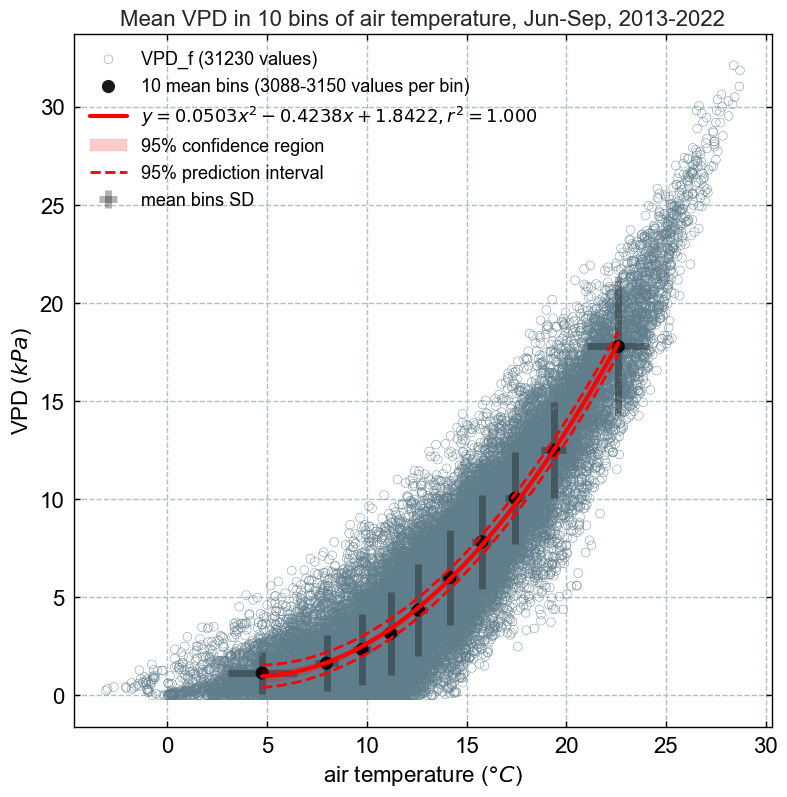

In [9]:
bf.showplot(
    show_unbinned_data=True,
    show_bin_variation=True,
    highlight_year=None,
    bin_size=90,
    bin_color='black',
    bin_edgecolor='None',
    bin_alpha=.9,
    fitline_color='red',    
    showfit=True,
    show_prediction_interval=True,    
    xlim=None,  # (0, 30)
    ylim=None,  # (-1, 0)    
    title='Mean VPD in 10 bins of air temperature, Jun-Sep, 2013-2022',
    xlabel=f"air temperature ($°C$)",
    ylabel=f"VPD ($kPa$)"
);

</br>

# **End of notebook.**

In [10]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-11-07 12:57:45
